In [2]:
import numpy as np
import cv2
import os.path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cd Downloads/

/Users/hasegawatakashikana/Downloads


In [4]:
def des_window():
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    cv2.waitKey(1) 

問１ RGB→BGR

In [201]:
img = cv2.imread("imori.jpg")
b,g,r = cv2.split(img)
img1 = cv2.merge([r,g,b])
cv2.imshow("問１",img1)
k = cv2.waitKey(0) & 0xFF 
if k== ord("q"):
    des_window()
img1

array([[[ 68,  79, 133],
        [ 39,  55, 104],
        [ 34,  55, 100],
        ...,
        [109, 109, 179],
        [ 70,  88, 138],
        [ 98, 128, 156]],

       [[ 68,  90, 140],
        [ 52,  65, 117],
        [ 48,  54, 106],
        ...,
        [135, 138, 181],
        [122, 137, 180],
        [ 89, 111, 152]],

       [[ 66,  86, 137],
        [ 65,  78, 131],
        [ 61,  66, 121],
        ...,
        [148, 155, 209],
        [159, 178, 236],
        [ 80, 105, 162]],

       ...,

       [[151, 173, 231],
        [ 78,  97, 153],
        [ 96, 108, 160],
        ...,
        [ 38,  55, 109],
        [ 38,  60, 101],
        [ 36,  59,  90]],

       [[174, 198, 255],
        [ 94, 114, 173],
        [104, 115, 169],
        ...,
        [ 57,  76, 152],
        [ 35,  59, 119],
        [ 32,  60, 108]],

       [[129, 155, 216],
        [109, 129, 188],
        [111, 124, 176],
        ...,
        [ 94, 117, 187],
        [ 71,  98, 153],
        [ 39,  71, 110]]

問２　グレースケール化

In [140]:
img = cv2.imread("imori.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


問３ 2値化

<function matplotlib.pyplot.show(*args, **kw)>

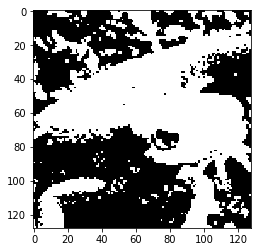

In [118]:
x = img_gray.copy()
y=[]
for i in range(len(x)):
    for _i, j in enumerate(x[i]):
#      y.append(0 if x[i]<128 else 255)
#          j=0 if j<128 else 255
#         print(j, x[i][_i])
        x[i][_i] = 0 if j<128 else 255
plt.imshow(x,plt.cm.gray)
plt.show

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("")

plt.imshow(img)
plt.show()

問４　大津の２値化

threshold>> 130


<function matplotlib.pyplot.show(*args, **kw)>

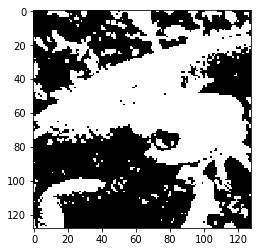

In [141]:
H,W,C =img.shape
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t


print("threshold>>",max_t)
th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255

plt.imshow(img_gray,plt.cm.gray)
plt.show

問５　HSV変換

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater_equal
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in less


<function matplotlib.pyplot.show(*args, **kw)>

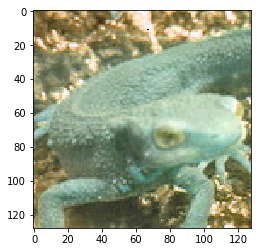

In [5]:
img = cv2.imread("imori.jpg")
#imgの値を[0,1]にする
img = img.copy()/255

#imgの大きさの要素が全て0の配列を作成する
out = np.zeros_like(img)
#imgのそれぞれのR,G,Bの値のなかでの最大、最小および最小値のインデックスを求める
max_v = np.max(img, axis=2).copy()
min_v = np.min(img, axis=2).copy()
min_arg = np.argmin(img, axis=2)

H = np.zeros_like(max_v)

H[np.where(max_v == min_v)] = 0
## if min == B
ind = np.where(min_arg == 0)
H[ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
## if min == R
ind = np.where(min_arg == 2)
H[ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
## if min == G
ind = np.where(min_arg == 1)
H[ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
    
V = max_v.copy()
S = max_v.copy() - min_v.copy()

#色相Hを反転させる
H = (H+180)%360

C = S
H_ =H/60
X = C * (1-np.abs(H_%2-1))
Z = np.zeros_like(H)

vals = [[Z,X,C],[Z,C,X],[X,C,Z],[C,X,Z],[C,Z,X],[X,Z,C]]

for i in range(6):
    ind = np.where((i <= H_)&(H_ <(i+1)))#該当領域のインデントだけとってきてそこにのみ作業を行う
    out[...,0][ind] = (V-C)[ind] +vals[i][0][ind]
    out[...,1][ind] = (V-C)[ind] +vals[i][1][ind]
    out[...,2][ind] = (V-C)[ind] +vals[i][2][ind]

out[np.where(max_v==min_v)]=0
out = (out*255)
out = out.astype(np.uint8)
out = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.imshow(out)
plt.show

imshowはuint8型の数値をうけとる　


    a = a.astype(uint8)
    a.astype(uint8)    は違う！（後者は結果が代入されない）
    

In [4]:
#わかりやすい配列のいじり方
a = np.array([10,20,30])
a[a<21]=0
a

array([ 0,  0, 30])

問６　減色処理

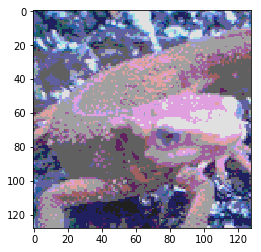

In [265]:
img = cv2.imread("imori.jpg")
#各要素に対して分類する
out1 = img.copy()

for i in range(4):
#     out1[...,0][np.where((64*i<=out1[...,0])&(out1[...,0]<64*(i+1)))]=32+64*i
#     out1[...,1][np.where((64*i<=out1[...,1])&(out1[...,1]<64*(i+1)))]=32+64*i
#     out1[...,2][np.where((64*i<=out1[...,2])&(out1[...,2]<64*(i+1)))]=32+64*i
    out1[np.where((64*i<=out1)&(out1<64*(i+1)))]=32+64*i


rgb = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()


問７　平均プーリング

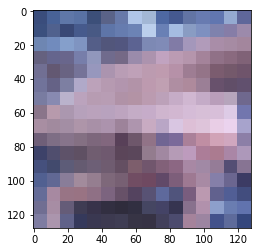

In [299]:
img = cv2.imread("imori.jpg")
out =img.copy()
H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1),G*x:G*(x+1),c]=np.mean(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)
rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

問８　最大値プーリング

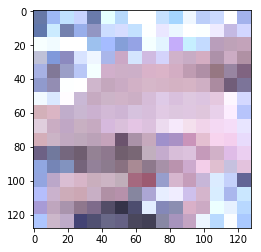

In [300]:
img = cv2.imread("imori.jpg")
out =img.copy()
H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1),G*x:G*(x+1),c]=np.max(out[G*y:G*(y+1),G*x:G*(x+1),c]).astype(np.int)
rgb = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

問９　ガウシアンフィルタ

[[0.16601045 0.23492656 0.16601045]
 [0.23492656 0.3324519  0.23492656]
 [0.16601045 0.23492656 0.16601045]]


<function matplotlib.pyplot.show(*args, **kw)>

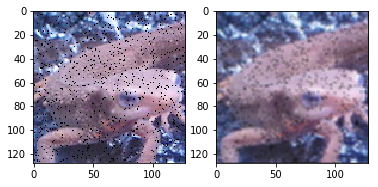

In [7]:
img = cv2.imread("imori_noise.jpg")
H,W,C = img.shape
#フィルターの設定
K_size = 3 #３かけ３の範囲
sigma = 1.2 #標準偏差

#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

#カーネル（フィルタ）作成
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
print(K)
K /= K.sum()


tmp = out.copy()
for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c]=np.sum(K*tmp[y:y+K_size,x:x+K_size,c])
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問１０　メディアンフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

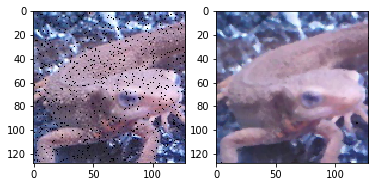

In [325]:
img = cv2.imread("imori_noise.jpg")
H,W,C = img.shape
#フィルターの設定
K_size = 3 #３かけ３の範囲
sigma = 1.2 #標準偏差

#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size//2
out = np.zeros((H+pad*2,W+pad*2,C),dtype=np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)

tmp = out.copy()
for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c]=np.median(tmp[y:y+K_size,x:x+K_size,c])
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問１１　平滑化フィルタ

<function matplotlib.pyplot.show(*args, **kw)>

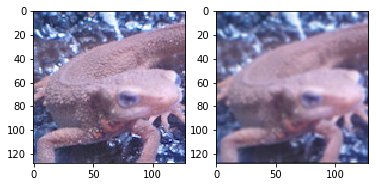

In [328]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
#フィルターの設定
K_size = 3 #３かけ３の範囲
sigma = 1.2 #標準偏差

#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size//2
out = np.zeros((H+pad*2,W+pad*2,C),dtype=np.float)
out[pad:pad+H,pad:pad+W] = img.copy().astype(np.float)

tmp = out.copy()
for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c]=np.mean(tmp[y:y+K_size,x:x+K_size,c])
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問１２　モーションフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

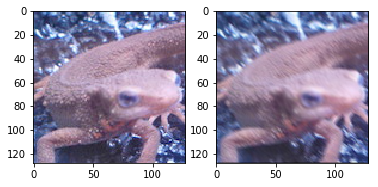

In [335]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

#モーションフィルタ作成
K = np.diag([1]*K_size).astype(np.float)
K /= K_size


tmp = out.copy()
for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c]=np.sum(K*tmp[y:y+K_size,x:x+K_size,c])
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show


In [11]:
L= np.diag([1]*5).astype(np.float)
L
M = [1]*5
np.diag(M)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

問１３　MAX-MINフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

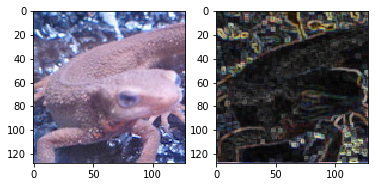

In [336]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)


tmp = out.copy()
for y in range(H):
    for x in range(W):
        for c in range(C):
            out[pad+y,pad+x,c]=np.max(tmp[y:y+K_size,x:x+K_size,c])-np.min(tmp[y:y+K_size,x:x+K_size,c])
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show



問１４　微分フィルタ（グレースケール画像について行う）

<function matplotlib.pyplot.show(*args, **kw)>

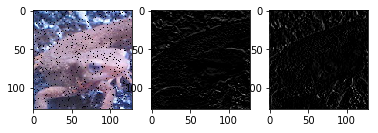

In [15]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)
img = gray
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out_v = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out_v[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
out_h = np.zeros((H + pad*2, W + pad*2,), dtype=np.float)
out_h[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

#微分フィルタ（縦、横）作成
K_v = [[0.,-1.,0.],[0.,1.,0.],[0.,0.,0.]]
K_h = [[0.,0.,0.],[-1.,1.,0.],[0.,0.,0.]]


tmp = out_v.copy()
for y in range(H):
    for x in range(W):
        out_v[pad+y,pad+x]=np.sum(K_v*tmp[y:y+K_size,x:x+K_size]) 
        out_h[pad+y,pad+x]=np.sum(K_h*tmp[y:y+K_size,x:x+K_size])

out_v[out_v<=0] =0
out_v[out_v>=255]=255
out_h[out_h<=0] =0
out_h[out_h>=255]=255
            
out_v = out_v[pad:pad+H,pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H,pad:pad+W].astype(np.uint8)

plt.subplot(131),plt.imshow(rgb1,plt.cm.gray)
plt.subplot(132),plt.imshow(out_v,plt.cm.gray)
plt.subplot(133),plt.imshow(out_h,plt.cm.gray)
plt.show

問１５　Sobelフィルタ(グレースケール画像について行う)

<function matplotlib.pyplot.show(*args, **kw)>

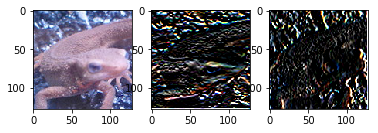

In [355]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)
img = gray
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out_v = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out_v[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
out_h = np.zeros((H + pad*2, W + pad*2,), dtype=np.float)
out_h[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)

#Sobelフィルタ（縦、横）作成
K_v = [[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]]
K_h = [[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]]


tmp = out_v.copy()
for y in range(H):
    for x in range(W):
        out_v[pad+y,pad+x]=np.sum(K_v*tmp[y:y+K_size,x:x+K_size]) 
        out_h[pad+y,pad+x]=np.sum(K_h*tmp[y:y+K_size,x:x+K_size])

out_v[out_v<=0] =0
out_v[out_v>=255]=255
out_h[out_h<=0] =0
out_h[out_h>=255]=255
            
out_v = out_v[pad:pad+H,pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H,pad:pad+W].astype(np.uint8)


plt.subplot(131),plt.imshow(rgb1,plt.cm.gray)
plt.subplot(132),plt.imshow(rgb2,plt.cm.gray)
plt.subplot(133),plt.imshow(rgb3,plt.cm.gray)
plt.show

問１６  Prewittフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

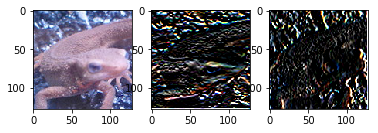

In [361]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
K_size = 3 #３かけ３の範囲
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)
img = gray
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out_v = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out_v[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
out_h = np.zeros((H + pad*2, W + pad*2,), dtype=np.float)
out_h[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
tmp = out_v.copy()

#Prewittフィルタ（縦、横）作成
K_v = [[-1.,-1.,-1.],[0.,0.,0.],[1.,1.,1.]]
K_h = [[-1.,0.,1.],[-1.,0.,1.],[-1.,0.,1.]]


tmp = out_v.copy()
for y in range(H):
    for x in range(W):
        out_v[pad+y,pad+x]=np.sum(K_v*tmp[y:y+K_size,x:x+K_size]) 
        out_h[pad+y,pad+x]=np.sum(K_h*tmp[y:y+K_size,x:x+K_size])

out_v[out_v<=0] =0
out_v[out_v>=255]=255
out_h[out_h<=0] =0
out_h[out_h>=255]=255
            
out_v = out_v[pad:pad+H,pad:pad+W].astype(np.uint8)
out_h = out_h[pad:pad+H,pad:pad+W].astype(np.uint8)


plt.subplot(131),plt.imshow(rgb1,plt.cm.gray)
plt.subplot(132),plt.imshow(rgb2,plt.cm.gray)
plt.subplot(133),plt.imshow(rgb3,plt.cm.gray)
plt.show

問１７　Laplacianフィルタ

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 25.  0.  0.]
 [ 0.  0. 18. ...  0.  0.  0.]
 ...
 [ 0.  0. 83. ... 56.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[  0   0   0 ...   0  25   0]
 [  0  18  16 ...   0   0   0]
 [  0   0  12 ...   0   0   0]
 ...
 [  0 119  18 ...  35   0   0]
 [  0  83  18 ...   6  56   0]
 [  0   0   0 ...   0   0   0]]


<function matplotlib.pyplot.show(*args, **kw)>

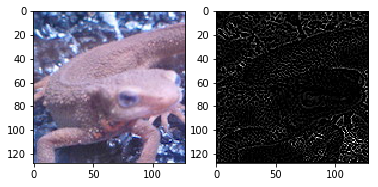

In [381]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)
img1 = gray
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img1.copy().astype(np.float)

tmp = out.copy()

#Laplacianフィルタ作成
K = [[0.,1.,0.],[1.,-4.,1.],[0.,1.,0.]]
tmp = out.copy()
for y in range(H):
    for x in range(W):
        out[pad+y,pad+x]=np.sum(K*tmp[y:y+K_size,x:x+K_size])
out[out<=0] =0
out[out>=255]=255
print(out)
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)
print(out)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(out,plt.cm.gray)
plt.show

問１８　Embossフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

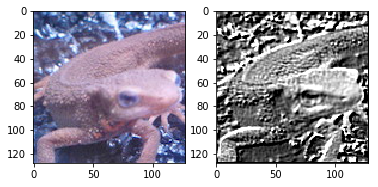

In [383]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)
img1 = gray
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img1.copy().astype(np.float)

tmp = out.copy()

#Embossフィルタ作成
K = [[-2.,-1.,0.],[-1.,1.,1.],[0.,1.,2.]]
tmp = out.copy()
for y in range(H):
    for x in range(W):
        out[pad+y,pad+x]=np.sum(K*tmp[y:y+K_size,x:x+K_size])
out[out<=0] =0
out[out>=255]=255
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(out,plt.cm.gray)
plt.show

問１９　LoGフィルタ

<function matplotlib.pyplot.show(*args, **kw)>

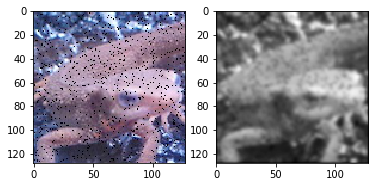

In [389]:
img = cv2.imread("imori_noise.jpg")
H,W,C = img.shape
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#がウシアンフィルター
K_size= 5
s = 3
#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = img1.copy().astype(np.float)
tmp = out.copy()
#カーネル（フィルタ）作成
K = np.zeros((K_size, K_size), dtype=np.float)
for x in range(-pad, -pad+K_size):
    
    for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()
#Laplacianフィルタ
for y in range(H):
    for x in range(W):
        out[pad+y,pad+x]=np.sum(K*tmp[y:y+K_size,x:x+K_size])
out[out<=0] =0
out[out>=255]=255
out = out[pad:pad+H,pad:pad+W].astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(out,plt.cm.gray)
plt.show

問２０　ヒストグラム表示

<function matplotlib.pyplot.show(*args, **kw)>

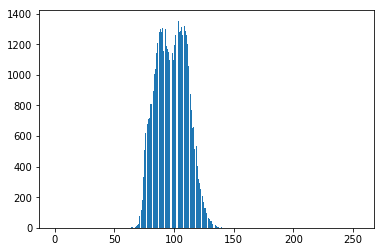

In [19]:
img = cv2.imread("imori_dark.jpg")
plt.hist(img.ravel(),bins = 255,rwidth=0.8,range=(0,255))
plt.show

問２１　ヒストグラム正規化

<function matplotlib.pyplot.show(*args, **kw)>

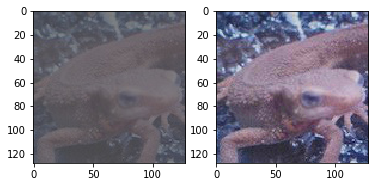

In [464]:
img = cv2.imread("imori_dark.jpg")
c  = np.min(img.ravel())
d  = np.max(img.ravel())
a = 0
b = 255
out = img.copy()
out[np.where(out<c)]=0
# print(out)
out = np.where(((c<=out)&(out<=d)),(b-a)/(d-c)*(out-c) +a,out)

# print(np.where((c<=out)&(out<=d)))
out[out<=0] =0
out[out>=255]=255

out = out.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.hist(out.ravel(),bins = 255,rwidth=0.8,range=(0,255))
plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2,plt.cm.gray)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

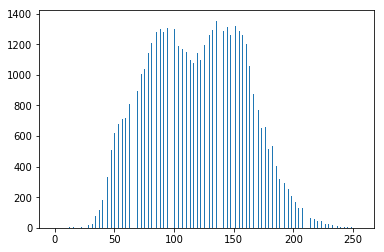

In [465]:
plt.hist(out.ravel(),bins = 255,rwidth=0.8,range=(0,255))
plt.show

問２２　ヒストグラム操作

<function matplotlib.pyplot.show(*args, **kw)>

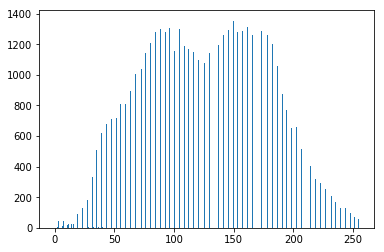

In [477]:
img = cv2.imread("imori_dark.jpg")
m0 =128
s0 =52
out = img.copy()
m = np.mean(out)
s = np.std(out)
out = s0 /s*(out-m) +m0
out = out.astype(np.uint8)
plt.hist(out.ravel(),bins = 255,rwidth=0.8,range=(0,255))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

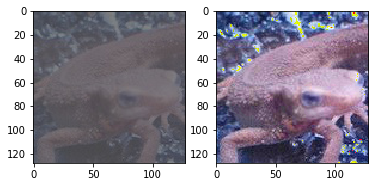

In [478]:
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２３　ヒストグラム平坦化

<function matplotlib.pyplot.show(*args, **kw)>

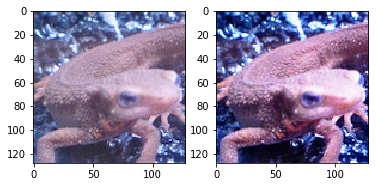

In [495]:
img = cv2.imread("imori.jpg").astype(np.float)
H,W,C = img.shape
S = H*W*C*1.
out = img.copy()
z_max = np.max(img)

sum_h = 0.
for i in range(1,255):
    ind = np.where(img==i)
    sum_h +=len(img[ind]) #今まで参照した要素数
    z_prime = z_max/S*sum_h #濃度はlen(ind)のこと
    out[ind] = z_prime
    
img = img.astype(np.uint8)    
out = out.astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

(array([106, 108, 108, 108, 110, 110, 111, 118, 119]), array([ 84, 120, 121, 121, 115, 115, 112, 111, 116]), array([2, 1, 1, 2, 1, 2, 2, 2, 2]))
3
[0 0 0 9 0 0 0 0 8]
9


<function matplotlib.pyplot.show(*args, **kw)>

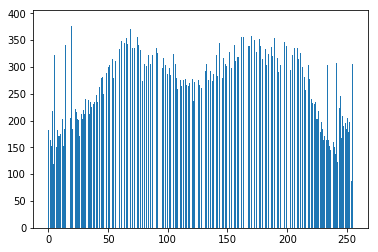

In [510]:
ind = np.where(img<10)
print(ind)
print(len(ind))
print(img[ind])
print(len(img[ind]))
plt.hist(out.ravel(),bins = 255,rwidth=0.8,range=(0,255))
plt.show

問２４　ガンマ補正

<function matplotlib.pyplot.show(*args, **kw)>

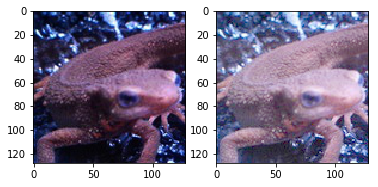

In [516]:
img = cv2.imread("imori_gamma.jpg")
c= 1.
g=2.2
out= img.copy()
out = out/255
out = (1/c * out)**(1/g)
out *=255
out = out.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２５　最近傍補間

(128, 128, 3)
(192, 192, 3)


<function matplotlib.pyplot.show(*args, **kw)>

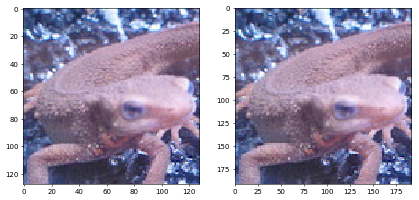

In [21]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape

a = 1.5
aH = int(a*H)
aW = int(a*W)
# print("aW:",aW)
# print("aH:",aH)

y = np.arange(aH).repeat(aW).reshape(aW,-1)
x = np.tile(np.arange(aW),(aH,1))
y = np.round(y/a).astype(np.uint8)
x = np.round(x/a).astype(np.uint8)
# print(y)
# print(x)
out = img[y,x]
print(img.shape)
print(out.shape)
rgb1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10), dpi=50)
plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２６　Bi-linear補間

[[  0   1   2 ... 189 190 191]
 [  0   1   2 ... 189 190 191]
 [  0   1   2 ... 189 190 191]
 ...
 [  0   1   2 ... 189 190 191]
 [  0   1   2 ... 189 190 191]
 [  0   1   2 ... 189 190 191]]


<function matplotlib.pyplot.show(*args, **kw)>

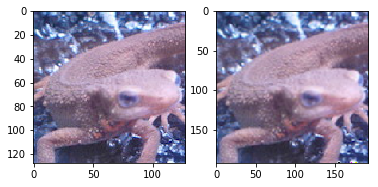

In [25]:
img = cv2.imread("imori.jpg")
H,W,C = img.shape

a = 1.5
aH = int(a*H)
aW = int(a*W)
y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
print(x)
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)
# print(ix)
ix = np.minimum(ix, W-2)
iy = np.minimum(iy, H-2)

dx = x-ix
dy = y-iy
#３次元に拡張したあとさらにrepeatすることでRGBの3要素分の値を生成している
dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
dy = np.repeat(np.expand_dims(dy, axis =-1),3,axis = -1)


out = (1-dx)*(1-dy)*img[iy,ix] + dx*(1-dy)*img[iy,ix+1] +(1-dx)*dy*img[iy+1,ix] +dx*dy*img[iy+1,ix+1]
out = out.astype(np.uint8)

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２７　Bi-cubic補間

<function matplotlib.pyplot.show(*args, **kw)>

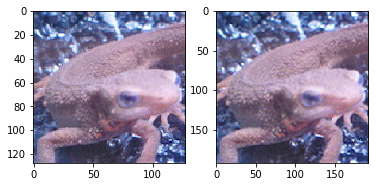

In [615]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape

a = 1.5
aH = int(a*H)
aW = int(a*W)
y = np.arange(aH).repeat(aW).reshape(aW, -1)
x = np.tile(np.arange(aW), (aH, 1))
y = (y / a)
x = (x / a)

ix = np.floor(x).astype(np.int)
iy = np.floor(y).astype(np.int)

ix = np.minimum(ix, W-1)
iy = np.minimum(iy, H-1)

dx2 = x - ix
dy2 = y - iy
dx1 = dx2 + 1
dy1 = dy2 + 1
dx3 = 1 - dx2
dy3 = 1 - dy2
dx4 = 1 + dx3
dy4 = 1 + dy3


dxs = [dx1, dx2, dx3, dx4]
dys = [dy1, dy2, dy3, dy4]

#重み付け関数
def weight(t):
    a = -1.
    at = np.abs(t)
    w = np.zeros_like(t)
    ind = np.where(at<=1)
    w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
    ind = np.where((at>1)&(at<=2))
    w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
    return w

w_sum = np.zeros((aH,aW,C),dtype=np.float32)
out = np.zeros((aH, aW, C), dtype=np.float32)

for j in range(-1, 3):
    for i in range(-1, 3):
        ind_x = np.minimum(np.maximum(ix + i, 0), W-1)
        ind_y = np.minimum(np.maximum(iy + j, 0), H-1)

        wx = weight(dxs[i+1])
        wy = weight(dys[j+1])
        wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
        wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

        w_sum += wx * wy
        out += wx * wy * img[ind_y, ind_x]

out[out>255]=255
out = out.astype(np.uint8)

img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２８　アフィン変換（平行移動）

<function matplotlib.pyplot.show(*args, **kw)>

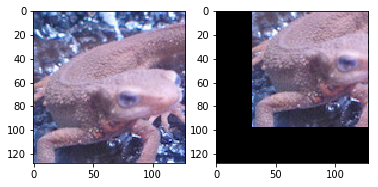

In [676]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape

#アフィン変換のもと
a = 1.
b = 0.
c = 0.
d = 1.
tx = 30 #xの変数ではない
ty = -30  #yの変数ではない

y = np.arange(H).repeat(W).reshape(W,-1)
x = np.tile(np.arange(W),(H,1))

out = np.zeros((H+1,W+1,C),dtype=np.float32)

x_new = a*x + b*y + tx
y_new = c*x + d*y + ty

x_new = np.minimum(np.maximum(x_new,0),W).astype(np.uint8)#最小値の調整したあとに最大値の調整
y_new = np.minimum(np.maximum(y_new,0),W).astype(np.uint8)

out[y_new,x_new] = img[y,x]
out = out[:H,:W]
out = out.astype(np.uint8)
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問２９　アフィン変換（拡大、縮小）

[[  0   1   2 ... 163 164 165]
 [  0   1   2 ... 163 164 165]
 [  0   1   2 ... 163 164 165]
 ...
 [  0   1   2 ... 163 164 165]
 [  0   1   2 ... 163 164 165]
 [  0   1   2 ... 163 164 165]]


<function matplotlib.pyplot.show(*args, **kw)>

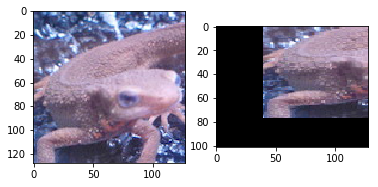

In [674]:
_img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = _img.shape

#アフィン変換のもと
a = 1.3 #x方向の拡大率
b = 0.
c = 0.
d = 0.8 #y方向の拡大率
tx = 30 #xの変数ではない
ty = -30  #yの変数ではない

img = np.zeros((H+2,W+2,C),dtype=np.float32)
img[1:H+1,1:W+1]=_img

H_new = np.round(H*d).astype(np.int)
W_new = np.round(W*a).astype(np.int)

x_new = np.tile(np.arange(W_new),(H_new,1))
print(x_new)
y_new = np.arange(H_new).repeat(W_new).reshape(H_new,-1)


adbc = a*d-b*c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1 #+1の意味？
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1


x = np.maximum((np.minimum(x,W+1)),0).astype(np.int)
y = np.maximum((np.minimum(y,H+1)),0).astype(np.int)

out = np.zeros((H_new+1,W_new+1,C),dtype=np.float32)
out[y_new,x_new]=img[y,x]
out = out[:H,:W]
out = out.astype(np.uint8)
img = _img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show



問３０　アフィン変換（回転）

<function matplotlib.pyplot.show(*args, **kw)>

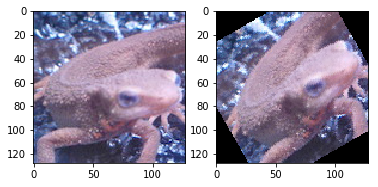

In [681]:
_img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = _img.shape
A =30
theta = -np.pi*A/180
#アフィン変換のもと
a = np.cos(theta) #x方向の拡大率
b = -np.sin(theta)
c = np.sin(theta)
d = np.cos(theta) #y方向の拡大率
tx = 0 #xの変数ではない
ty = 0  #yの変数ではない

img = np.zeros((H+2,W+2,C),dtype=np.float32)
img[1:H+1,1:W+1]=_img

H_new = np.round(H).astype(np.int)
W_new = np.round(W).astype(np.int)

x_new = np.tile(np.arange(W_new),(H_new,1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new,-1)


adbc = a*d-b*c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1 #+1の意味？
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

dcx = (x.max()+x.min())//2-W//2
dcy = (y.max()+y.min())//2-H//2

x -= dcx
y -=dcy

x = np.maximum((np.minimum(x,W+1)),0).astype(np.int)
y = np.maximum((np.minimum(y,H+1)),0).astype(np.int)

out[y_new,x_new]=img[y,x]
out = out[:H,:W]
out = out.astype(np.uint8)
img = _img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問３１　アフィン変換（スキュー）

<function matplotlib.pyplot.show(*args, **kw)>

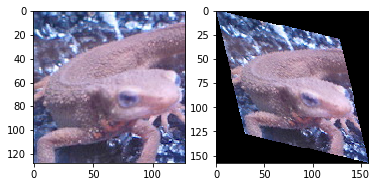

In [693]:
_img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = _img.shape

#アフィン変換のもと
dx = 30.
dy=30.
a =  1.
b = dx/H
c = dy/W
d = 1.
tx=0.
ty=0.

img = np.zeros((H+2,W+2,C),dtype=np.float32)
img[1:H+1,1:W+1]=_img

H_new = np.ceil(dy+H).astype(np.int)
W_new = np.ceil(dx+W).astype(np.int)

out = np.zeros((H_new,W_new,C),dtype=np.float32)

x_new = np.tile(np.arange(W_new),(H_new,1))
y_new = np.arange(H_new).repeat(W_new).reshape(H_new,-1)


adbc = a*d-b*c
x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1 #+1の意味？
y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

x = np.maximum((np.minimum(x,W+1)),0).astype(np.int)
y = np.maximum((np.minimum(y,H+1)),0).astype(np.int)

out[y_new,x_new]=img[y,x]
# out = out[:H,:W]
out = out.astype(np.uint8)
img = _img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問３２　フーリエ変換(DFT)

In [695]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

<function matplotlib.pyplot.show(*args, **kw)>

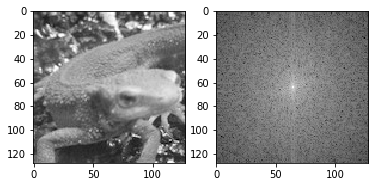

In [703]:
#(1)
fimg = np.fft.fft2(gray)
#第１象限と第３象限、第2象限と第４象限を入れ替え
fimg = np.fft.fftshift(fimg)
#パワースペクトルの計算
mag = 20*np.log(np.abs(fimg))
#入力画像とスペクトル画像をグラフ描画
plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(mag,cmap="gray")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

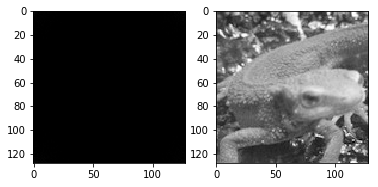

In [715]:
#(2)
K=W
L=H
M=W
N=H

G=np.zeros((L,K),dtype=np.complex)
y = np.arange(H).repeat(W).reshape(W,-1)
x = np.tile(np.arange(W),(H,1))



for l in range(L):
    for k in range(K):
        G[l,k] = np.sum(gray*np.exp(-2j*np.pi*(x*k/M+y*l/N)))/np.sqrt(M*N)

ps = (np.abs(G)/np.abs(G).max()*255).astype(np.uint8)

out = np.zeros((H,W),dtype=np.float32)
for n in range(N):
    for m in range(M):
        out[n,m]=np.abs(np.sum(G * np.exp(2j*np.pi*(x*m/M+y*n/N))))/np.sqrt(M*N)

out[out>255]=255
out = out.astype(np.uint8)
plt.subplot(121),plt.imshow(ps,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問３３　フーリエ変換（ローパスフィルタ）

<function matplotlib.pyplot.show(*args, **kw)>

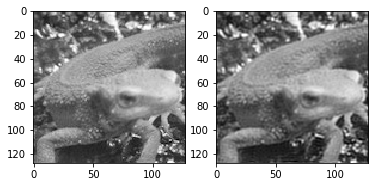

In [722]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
    for k in range(K):
        G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x * k / M + y * l / N))) / np.sqrt(M * N)
        
# LowPassFilter
_G = np.zeros_like(G)
_G[:H//2,:W//2]=G[H//2:,W//2:]
_G[:H//2,W//2:]=G[H//2:,:W//2]
_G[H//2:,W//2:]=G[:H//2,:W//2]
_G[H//2:,:W//2]=G[:H//2,W//2:]
p=0.5
_x = x-W//2
_y = y-H//2
r = np.sqrt(_x**2+_y**2)
mask = np.ones((H,W),dtype=np.float32)
mask[r>(np.sqrt(((W//2)**2)+((H//2)**2))*p)]=0

_G *= mask
G[:H//2,:W//2]=_G[H//2:,W//2:]
G[:H//2,W//2:]=_G[H//2:,:W//2]
G[H//2:,W//2:]=_G[:H//2,:W//2]
G[H//2:,:W//2]=_G[:H//2,W//2:]

out = np.zeros((H,W),dtype=np.float32)
for n in range(N):
    for m in range(M):
        out[n,m]=np.abs(np.sum(G * np.exp(2j*np.pi*(x*m/M+y*n/N))))/np.sqrt(M*N)

out[out>255]=255
out = out.astype(np.uint8)


plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問２４　フーリエ変換（ハイパスフィルタ）

<function matplotlib.pyplot.show(*args, **kw)>

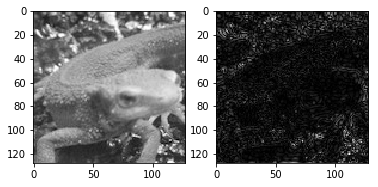

In [723]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
    for k in range(K):
        G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x * k / M + y * l / N))) / np.sqrt(M * N)
        
# LowPassFilter
_G = np.zeros_like(G)
_G[:H//2,:W//2]=G[H//2:,W//2:]
_G[:H//2,W//2:]=G[H//2:,:W//2]
_G[H//2:,W//2:]=G[:H//2,:W//2]
_G[H//2:,:W//2]=G[:H//2,W//2:]
p=0.2
_x = x-W//2
_y = y-H//2
r = np.sqrt(_x**2+_y**2)
mask = np.ones((H,W),dtype=np.float32)
mask[r<(np.sqrt(((W//2)**2)+((H//2)**2))*p)]=0

_G *= mask
G[:H//2,:W//2]=_G[H//2:,W//2:]
G[:H//2,W//2:]=_G[H//2:,:W//2]
G[H//2:,W//2:]=_G[:H//2,:W//2]
G[H//2:,:W//2]=_G[:H//2,W//2:]

out = np.zeros((H,W),dtype=np.float32)
for n in range(N):
    for m in range(M):
        out[n,m]=np.abs(np.sum(G * np.exp(2j*np.pi*(x*m/M+y*n/N))))/np.sqrt(M*N)

out[out>255]=255
out = out.astype(np.uint8)


plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問３５　フーリエ変換（バンドパスフィルタ）

<function matplotlib.pyplot.show(*args, **kw)>

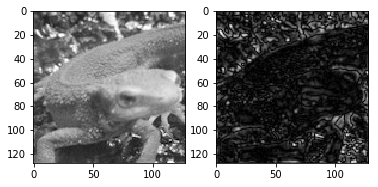

In [731]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

# DFT
K = W
L = H
M = W
N = H

G = np.zeros((L, K), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for l in range(L):
    for k in range(K):
        G[l, k] = np.sum(gray * np.exp(-2j * np.pi * (x * k / M + y * l / N))) / np.sqrt(M * N)
        
# LowPassFilter
_G = np.zeros_like(G)
_G[:H//2,:W//2]=G[H//2:,W//2:]
_G[:H//2,W//2:]=G[H//2:,:W//2]
_G[H//2:,W//2:]=G[:H//2,:W//2]
_G[H//2:,:W//2]=G[:H//2,W//2:]
p1=0.1
p2=0.5
_x = x-W//2
_y = y-H//2
r = np.sqrt(_x**2+_y**2)
mask = np.ones((H,W),dtype=np.float32)
max_r = np.sqrt(((W//2)**2)+((H//2)**2))
mask[np.where((r<(max_r*p1))|(r>(max_r*p2)))]=0

_G *= mask
G[:H//2,:W//2]=_G[H//2:,W//2:]
G[:H//2,W//2:]=_G[H//2:,:W//2]
G[H//2:,W//2:]=_G[:H//2,:W//2]
G[H//2:,:W//2]=_G[:H//2,W//2:]

out = np.zeros((H,W),dtype=np.float32)
for n in range(N):
    for m in range(M):
        out[n,m]=np.abs(np.sum(G * np.exp(2j*np.pi*(x*m/M+y*n/N))))/np.sqrt(M*N)

out[out>255]=255
out = out.astype(np.uint8)


plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問３６　JPEG圧縮 (Step.1)離散コサイン変換（DCT）

<function matplotlib.pyplot.show(*args, **kw)>

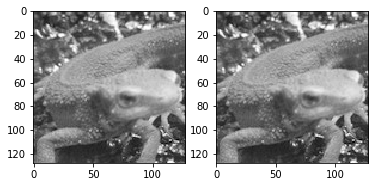

In [755]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

T = 8
K = 8

X =np.zeros((H,W),dtype=np.float32)

def w(x,y,u,v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi/(2*T)
    return (2*cu*cv/T)*np.cos((2*x+1)*u*theta)*np.cos((2*y+1)*v*theta)

#DCT
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        X[v+yi,u+xi]+=gray[y+yi,x+xi]*w(x,y,u,v)

#IDCT 
out = np.zeros((H,W),dtype=np.float32)
for yi in range(0, H, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)

out[out>255]=255
out = np.round(out).astype(np.uint8)

plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

In [757]:
mse = np.sum(np.power(np.abs(gray-out),2))/H*W
psnr = 10*np.log10(255.**2/mse)

問３７　PSNR

PSMR : 27.612599576647916
bitrate: 2.0


<function matplotlib.pyplot.show(*args, **kw)>

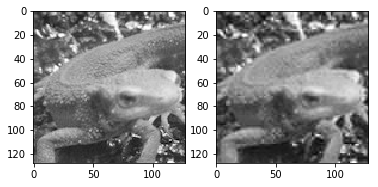

In [762]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

T = 8
K = 4

X =np.zeros((H,W),dtype=np.float32)

def w(x,y,u,v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi/(2*T)
    return (2*cu*cv/T)*np.cos((2*x+1)*u*theta)*np.cos((2*y+1)*v*theta)

#DCT
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        X[v+yi,u+xi]+=gray[y+yi,x+xi]*w(x,y,u,v)

#IDCT 
out = np.zeros((H,W),dtype=np.float32)
for yi in range(0, H, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)

out[out>255]=255
out = out.astype(np.uint8)

mse = np.sum(np.power(np.abs(gray.astype(np.float32) - out.astype(np.float32)),2))/(H*W)
psnr = 10*np.log10(255.**2/mse)
print("PSMR :",psnr)
bitrate =1.* T*K**2/(T**2)
print("bitrate:",bitrate)
plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問３８　JPEG圧縮 (Step.2)DCT+量子化

PSMR : 27.387321099217353
bitrate: 2.0


<function matplotlib.pyplot.show(*args, **kw)>

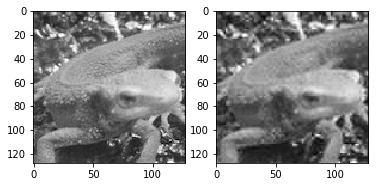

In [765]:
Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
              (12, 12, 14, 19, 26, 58, 60, 55),
              (14, 13, 16, 24, 40, 57, 69, 56),
              (14, 17, 22, 29, 51, 87, 80, 62),
              (18, 22, 37, 56, 68, 109, 103, 77),
              (24, 35, 55, 64, 81, 104, 113, 92),
              (49, 64, 78, 87, 103, 121, 120, 101),
              (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

T = 8
K = 4

X =np.zeros((H,W),dtype=np.float32)

def w(x,y,u,v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi/(2*T)
    return (2*cu*cv/T)*np.cos((2*x+1)*u*theta)*np.cos((2*y+1)*v*theta)

#DCT
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        X[v+yi,u+xi]+=gray[y+yi,x+xi]*w(x,y,u,v)
        X[yi:yi+T,xi:xi+T]=np.round(X[yi:yi+T,xi:xi+T]/Q)*Q

#IDCT 
out = np.zeros((H,W),dtype=np.float32)
for yi in range(0, H, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += X[v+yi, u+xi] * w(x,y,u,v)

out[out>255]=255
out = out.astype(np.uint8)
mse = np.sum(np.power(np.abs(gray.astype(np.float32) - out.astype(np.float32)),2))/(H*W)
psnr = 10*np.log10(255.**2/mse)
print("PSMR :",psnr)
bitrate =1.* T*K**2/(T**2)
print("bitrate:",bitrate)
cv2.imwrite("out.jpg", out)
plt.subplot(121),plt.imshow(gray,cmap="gray")
plt.subplot(122),plt.imshow(out,cmap="gray")
plt.show

問３９　JPEG圧縮 (Step.3)YCbCr表色系

<function matplotlib.pyplot.show(*args, **kw)>

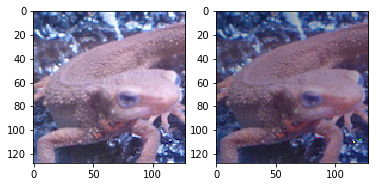

In [772]:
img = cv2.imread("imori.jpg").astype(np.float32)
B,G,R=cv2.split(img)
Y = 0.299 * R + 0.5870 * G + 0.114 * B
Cb = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
Cr = 0.5 * R - 0.4187 * G - 0.0813 * B + 128
Y*=0.7
R = Y + (Cr - 128) * 1.402
G = Y - (Cb - 128) * 0.3441 - (Cr - 128) * 0.7139
B = Y + (Cb - 128) * 1.7718
out = cv2.merge([B,G,R]).astype(np.uint8)
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show



問４０　JPEG圧縮 (Step.4)YCbCr+DCT+量子化

<function matplotlib.pyplot.show(*args, **kw)>

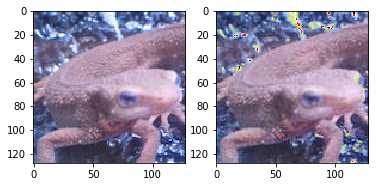

In [841]:
Q1 = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
               (12, 12, 14, 19, 26, 58, 60, 55),
               (14, 13, 16, 24, 40, 57, 69, 56),
               (14, 17, 22, 29, 51, 87, 80, 62),
               (18, 22, 37, 56, 68, 109, 103, 77),
               (24, 35, 55, 64, 81, 104, 113, 92),
               (49, 64, 78, 87, 103, 121, 120, 101),
               (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

Q2 = np.array(((17, 18, 24, 47, 99, 99, 99, 99),
               (18, 21, 26, 66, 99, 99, 99, 99),
               (24, 26, 56, 99, 99, 99, 99, 99),
               (47, 66, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99)), dtype=np.float32)
img = cv2.imread("imori.jpg").astype(np.float32)
B,G,R=cv2.split(img)
Y = 0.299 * R + 0.5870 * G + 0.114 * B
Cb = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
Cr = 0.5 * R - 0.4187 * G - 0.0813 * B + 128

T = 8
K = 8
H,W=Y.shape
XYZ = cv2.merge([Y,Cb,Cr]).copy()
X=np.zeros_like(Y)
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        X[v+yi,u+xi]+=XYZ[y+yi,x+xi,0]*w(x,y,u,v)
        X[yi:yi+T,xi:xi+T]=np.round(X[yi:yi+T,xi:xi+T]/Q1)*Q1



H,W=Cb.shape
Y1=np.zeros_like(Cb)
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        Y1[v+yi,u+xi]+=XYZ[y+yi,x+xi,1]*w(x,y,u,v)
        Y1[yi:yi+T,xi:xi+T]=np.round(Y1[yi:yi+T,xi:xi+T]/Q2)*Q2

H,W=Cr.shape
Z=np.zeros_like(Cr)
for yi in range(0,H,T):
    for xi in range(0,W,T):
        for y in range(T):
            for x in range(T):
                for v in range(T):
                    for u in range(T):
                        Z[v+yi,u+xi]+=XYZ[y+yi,x+xi,2]*w(x,y,u,v)
        Z[yi:yi+T,xi:xi+T]=np.round(Z[yi:yi+T,xi:xi+T]/Q2)*Q2

XYZ = cv2.merge([X,Y1,Z])

out = np.zeros((H,W,3),dtype=np.float32)
for yi in range(0, H, T):
    for xi in range(0, W, T):
        for y in range(T):
            for x in range(T):
                for v in range(K):
                    for u in range(K):
                        out[y+yi, x+xi] += XYZ[v+yi, u+xi] * w(x,y,u,v)

Y,Cb,Cr = cv2.split(out)

R = Y + (Cr - 128) * 1.402
G = Y - (Cb - 128) * 0.3441 - (Cr - 128) * 0.7139
B = Y + (Cb - 128) * 1.7718
out=cv2.merge([B,G,R])
out = out.astype(np.uint8)

img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問４１　Cannyエッジ検出 (Step.1) エッジ強度

１：ガウシアンフィルタを掛ける

２：x, y方向のSobelフィルタを掛け、それらからエッジ強度とエッジ勾配を求める

<function matplotlib.pyplot.show(*args, **kw)>

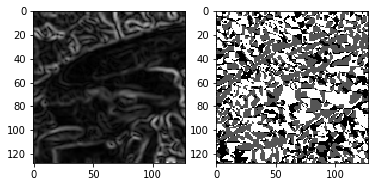

In [960]:
img = cv2.imread("imori.jpg").astype(np.float32)
H,W,C = img.shape
#グレースケール化
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

#フィルターの設定
K_size = 5 
sigma = 1.4 #標準偏差

#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
out = np.pad(gray, (pad, pad), 'edge') #コピーを使用することで元データの書き換えの影響を受けなくなる
tmp = out.copy()
#カーネル（フィルタ）作成
K = np.zeros((K_size, K_size), dtype=np.float32)
for x in range(-pad, -pad+K_size):
     for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()


for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

#Sobelフィルタ（縦、横）作成
K_v =  np.array(((-1., -2., -1.), (0., 0., 0.), (1., 2., 1.)), dtype=np.float32)
K_h =  np.array(((-1., 0., 1.), (-2., 0., 2.), (-1., 0., 1.)), dtype=np.float32)

out = out[pad-1:H+pad+1, pad-1:W+pad+1]
out_h = np.zeros_like(out, dtype=np.float32)
# out_v[pad:pad+H, pad:pad+W] = out.copy().astype(np.float)
out_v =  np.zeros_like(out, dtype=np.float32)
# out_h[pad:pad+H, pad:pad+W] = out.copy().astype(np.float)
K_size=3
pad = K_size // 2



# tmp = out_v.copy()
# print(out_v.shape)
for y in range(H):
    for x in range(W):
        out_h[pad+y, pad+x] = np.sum(K_v * out[y:y+K_size, x:x+K_size])
        out_v[pad+y, pad+x] = np.sum(K_h * out[y:y+K_size, x:x+K_size])
out_v = out_v[pad:pad+H,pad:pad+W]
out_h = out_h[pad:pad+H,pad:pad+W]

# out_v[out_v<=0] =0
# out_v[out_v>=255]=255
# out_h[out_h<=0] =0
# out_h[out_h>=255]=255
            

edge = np.sqrt(np.power(out_v,2)+np.power(out_h,2))
out_v[out_v == 0] = 1e-5
tan = np.arctan(out_h/out_v)
angle = np.zeros_like(tan, dtype=np.uint8)
angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135
img = img.astype(np.uint8)
out2 = angle.astype(np.uint8)
plt.subplot(121),plt.imshow(edge,cmap="gray")
plt.subplot(122),plt.imshow(out2,cmap="gray")
plt.show

問４２　Cannyエッジ検出 (Step.2) 細線化

エッジ勾配の値から、Non-maximum suppression によりエッジの細線化を行う

<function matplotlib.pyplot.show(*args, **kw)>

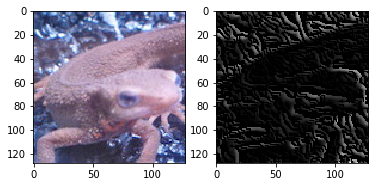

In [962]:
for y in range(H):
    for x in range(W):
        if angle[y,x]==0:
            dx1,dx2,dy1,dy2 = -1,0,1,0
        elif angle[y,x] ==45:
            dx1,dx2,dy1,dy2 = -1,1,1,-1
        elif angle[y,x] ==90:
            dx1,dx2,dy1,dy2 = 0,-1,0,1
        elif angle[y,x] ==135:
            dx1,dx2,dy1,dy2 = -1,-1,1,1
        if x ==0:
            dx1 = max(dx1,0)
            dx2 = max(dx2,0)
        if x==W-1:
            dx1 = min(dx1,0)
            dx2 = min(dx2,0)
        if y ==0:
            dy1 = max(dy1,0)
            dy2 = max(dy2,0)
        if y==H-1:
            dy1 = min(dy1,0)
            dy2 = min(dy2,0)
        if max(edge[y,x],edge[y+dy1,x+dx1],edge[y+dy2,x+dx2])!=edge[y,x]:
            edge[y,x]=0
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out = edge.astype(np.uint8)
plt.subplot(121),plt.imshow(rgb1,cmap="gray")
plt.subplot(122),plt.imshow(edge,cmap="gray")
plt.show

問４３　　Cannyエッジ検出 (Step.3) ヒステリシス閾処理

ヒステリシスによる閾値処理を行う


<function matplotlib.pyplot.show(*args, **kw)>

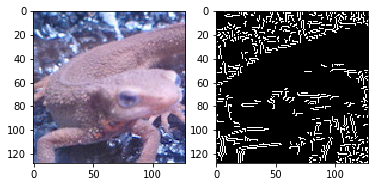

In [967]:
HT = 100
LT = 30
edge[edge>=HT]=255
edge[edge<=LT]=0

_edge = np.zeros((H+2,W+2),dtype=np.float32)
_edge[1:H+1,1:W+1]=edge
#近辺の８個
nn = np.array(((1.,1.,1.),(1.,0.,1.),(1.,1.,1.)),dtype=np.float32)
for y in range(1,H+2):
    for w in range(1,W+2):
        if _edge[y,x]<=LT or _edge[y,x]>=HT:
            continue
        if np.max(_edge[y-1:y+2,x-1:x+2]*nn)>=HT:
            _edge[y,x]=255
        else :
            _edge[y,x]=0
            
edge = _edge[1:H+1,1:W+1]
plt.subplot(121),plt.imshow(rgb1,cmap="gray")
plt.subplot(122),plt.imshow(edge,cmap="gray")
plt.show

問４４　Hough変換・直線検出 (Step.1) Hough変換

エッジ画像からエッジのピクセルにおいてHough変換を行う。

<function matplotlib.pyplot.show(*args, **kw)>

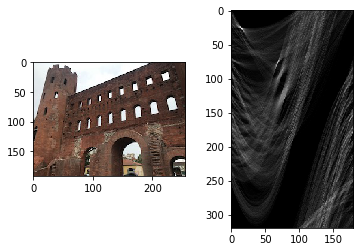

In [970]:
img = cv2.imread("thorino.jpg").astype(np.float32)
H,W,C = img.shape
#グレースケール化
gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]

#フィルターの設定
K_size = 5 
sigma = 1.4 #標準偏差

#０パディングで元画像より少しおおきめの画像を生成する（外枠は全て０)
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
out = np.pad(gray, (pad, pad), 'edge') #コピーを使用することで元データの書き換えの影響を受けなくなる
tmp = out.copy()
#カーネル（フィルタ）作成
K = np.zeros((K_size, K_size), dtype=np.float32)
for x in range(-pad, -pad+K_size):
     for y in range(-pad, -pad+K_size):
        K[y+pad, x+pad] = np.exp( -(x**2 + y**2) / (2* (sigma**2)))
K /= (sigma * np.sqrt(2 * np.pi))
K /= K.sum()


for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * tmp[y:y+K_size, x:x+K_size])

#Sobelフィルタ（縦、横）作成
K_v =  np.array(((-1., -2., -1.), (0., 0., 0.), (1., 2., 1.)), dtype=np.float32)
K_h =  np.array(((-1., 0., 1.), (-2., 0., 2.), (-1., 0., 1.)), dtype=np.float32)

out = out[pad-1:H+pad+1, pad-1:W+pad+1]
out_h = np.zeros_like(out, dtype=np.float32)
# out_v[pad:pad+H, pad:pad+W] = out.copy().astype(np.float)
out_v =  np.zeros_like(out, dtype=np.float32)
# out_h[pad:pad+H, pad:pad+W] = out.copy().astype(np.float)
K_size=3
pad = K_size // 2



# tmp = out_v.copy()
# print(out_v.shape)
for y in range(H):
    for x in range(W):
        out_h[pad+y, pad+x] = np.sum(K_v * out[y:y+K_size, x:x+K_size])
        out_v[pad+y, pad+x] = np.sum(K_h * out[y:y+K_size, x:x+K_size])
out_v = out_v[pad:pad+H,pad:pad+W]
out_h = out_h[pad:pad+H,pad:pad+W]

# out_v[out_v<=0] =0
# out_v[out_v>=255]=255
# out_h[out_h<=0] =0
# out_h[out_h>=255]=255
            

edge = np.sqrt(np.power(out_v,2)+np.power(out_h,2))
out_v[out_v == 0] = 1e-5
tan = np.arctan(out_h/out_v)
angle = np.zeros_like(tan, dtype=np.uint8)
angle[np.where((tan > -0.4142) & (tan <= 0.4142))] = 0
angle[np.where((tan > 0.4142) & (tan < 2.4142))] = 45
angle[np.where((tan >= 2.4142) | (tan <= -2.4142))] = 95
angle[np.where((tan > -2.4142) & (tan <= -0.4142))] = 135

for y in range(H):
    for x in range(W):
        if angle[y,x]==0:
            dx1,dx2,dy1,dy2 = -1,0,1,0
        elif angle[y,x] ==45:
            dx1,dx2,dy1,dy2 = -1,1,1,-1
        elif angle[y,x] ==90:
            dx1,dx2,dy1,dy2 = 0,-1,0,1
        elif angle[y,x] ==135:
            dx1,dx2,dy1,dy2 = -1,-1,1,1
        if x ==0:
            dx1 = max(dx1,0)
            dx2 = max(dx2,0)
        if x==W-1:
            dx1 = min(dx1,0)
            dx2 = min(dx2,0)
        if y ==0:
            dy1 = max(dy1,0)
            dy2 = max(dy2,0)
        if y==H-1:
            dy1 = min(dy1,0)
            dy2 = min(dy2,0)
        if max(edge[y,x],edge[y+dy1,x+dx1],edge[y+dy2,x+dx2])!=edge[y,x]:
            edge[y,x]=0
HT = 100
LT = 30
edge[edge>=HT]=255
edge[edge<=LT]=0

_edge = np.zeros((H+2,W+2),dtype=np.float32)
_edge[1:H+1,1:W+1]=edge
#近辺の８個
nn = np.array(((1.,1.,1.),(1.,0.,1.),(1.,1.,1.)),dtype=np.float32)
for y in range(1,H+2):
    for w in range(1,W+2):
        if _edge[y,x]<=LT or _edge[y,x]>=HT:
            continue
        if np.max(_edge[y-1:y+2,x-1:x+2]*nn)>=HT:
            _edge[y,x]=255
        else :
            _edge[y,x]=0
            
edge = _edge[1:H+1,1:W+1]

drho = 1
dtheta = 1
rho_max = np.ceil(np.sqrt(H**2+W**2)).astype(np.int)
hough = np.zeros((rho_max,180),dtype=np.int)

ind = np.where(edge==255)

for y,x in zip(ind[0],ind[1]):
    for theta in  range(0,180,dtheta):
        t = np.pi/180*theta
        rho = int(x*np.cos(t)+y*np.sin(t))
        hough[rho,theta]+= 1

out = hough.astype(np.uint8)
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(rgb1,cmap="gray")
plt.subplot(122),plt.imshow(hough,cmap="gray")
plt.show


問４５　 Hough変換・直線検出 (Step.2) NMS

Hough変換後の値のヒストグラムをとり、極大点を選ぶ。

<function matplotlib.pyplot.show(*args, **kw)>

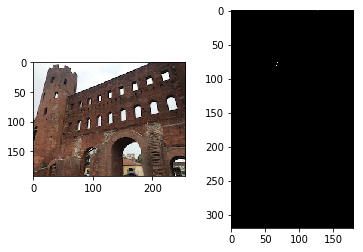

In [985]:
for y in range(rho_max):
    for x in range(180):
        x1 = max(x-1,0)
        x2 = min(x+2,180)
        y1 = max(y-1,0)
        y2 = min(y+2,rho_max)
        if np.max(hough[y1:y2,x1:x2])==hough[y,x] and hough[y,x] !=0:
            pass
        else:
            hough[y,x]=0
ind_x = np.argsort(hough.ravel())[::-1][:10]
ind_y = ind_x.copy()
thetas = ind_x%180
rhos = ind_y//180
print()
_hough = np.zeros_like(hough,dtype = np.int)
_hough[rhos,thetas]=255
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1,cmap="gray")
plt.subplot(122),plt.imshow(_hough,cmap="gray")
plt.show

問４６　Hough変換・直線検出 (Step.3) Hough逆変換

極大点のr, tの値をHough逆変換して検出した直線のパラメータを得る。

<function matplotlib.pyplot.show(*args, **kw)>

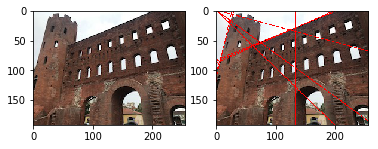

In [1005]:

out = img.copy()
for theta, rho in zip(thetas, rhos):
    t = np.pi / 180. * theta
    for x in range(W):
        if np.sin(t) != 0:
            y = - (np.cos(t) / np.sin(t)) * x + rho / np.sin(t)
            y = int(y)
            if y >= H or y < 0:
                continue
            out[y, x] = [0, 0, 255]
    for y in range(H):
        if np.cos(t) != 0:
            x = - (np.sin(t) / np.cos(t)) * y + rho / np.cos(t)
            x = int(x)
            if x >= W or x < 0:
                continue
            out[y, x] = [0, 0, 255]
out = out.astype(np.uint8)
img = img.astype(np.uint8)
rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(rgb2)
plt.show

問４７　モルフォロジー処理(膨張)

threshold>> 1


<function matplotlib.pyplot.show(*args, **kw)>

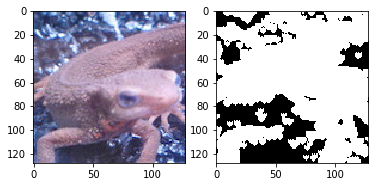

In [1009]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t


print("threshold>>",max_t)
th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255

## Morphology - dilate
Dil_time = 2
MF = np.array(((0,1,0),(1,0,1),(1,0,1)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(img_gray,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                img_gray[y-1,x-1]=255

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(img_gray,cmap ="gray")
plt.show

問４８　 モルフォロジー処理(収縮)

threshold>> 127


<function matplotlib.pyplot.show(*args, **kw)>

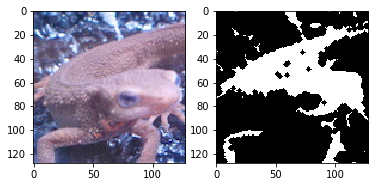

In [1019]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
img_gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t
th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255
out = img_gray
## Morphology - dilate
Erode_time = 2
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)


for i in range(Erode_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
#             if tmp[y,x]!=255:
#                 continue
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out[y-1,x-1]=0

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(out,cmap ="gray")
plt.show

問４９　オープニング処理

<function matplotlib.pyplot.show(*args, **kw)>

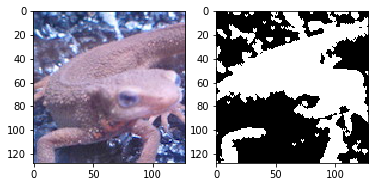

In [1023]:
img = cv2.imread("imori.jpg")
H,W,C =img.shape
img_gray = 0.2126*img[:,:,2]+0.7152*img[:,:,1]+0.0722*img[:,:,0]
max_sigma = 0
max_t = 0

for _t in range(1, 255):
    v0 = img_gray[np.where(img_gray < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = img_gray[np.where(img_gray >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t
th = max_t
img_gray[img_gray <th]=0
img_gray[img_gray >=th]=255
out = img_gray
## Morphology - dilate
Erode_time = 1
MF = np.array(((0, 1, 0),
               (1, 0, 1),
               (0, 1, 0)), dtype=np.int)


for i in range(Erode_time):
    tmp = np.pad(out,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
#             if tmp[y,x]!=255:
#                 continue
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])<255*4:
                out[y-1,x-1]=0
img_gray=out
Dil_time = 1
MF = np.array(((0,1,0),(1,0,1),(1,0,1)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(img_gray,(1,1),"edge")
    for y in range(1,H+1):
        for x in range(1,W+1):
            if np.sum(MF*tmp[y-1:y+2,x-1:x+2])>=255:
                img_gray[y-1,x-1]=255

rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(img_gray,cmap ="gray")
plt.show

問５０　クロージング処理

<function matplotlib.pyplot.show(*args, **kw)>

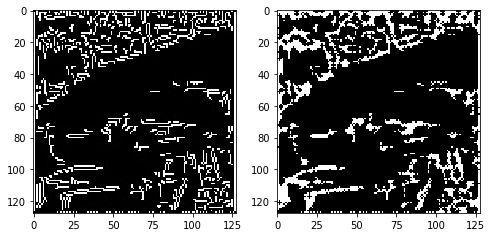

In [1100]:
img_gray=cv2.imread("answer_43.jpg",0).astype(np.uint8)
# img_gray = 0.2126*img1[:,:,2]+0.7152*img1[:,:,1]+0.0722*img1[:,:,0]
H,W=img_gray.shape

Dil_time = 1
out=img_gray.copy()
MF = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=np.int)
for i in range(Dil_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
                out[y-1, x-1] = 255

# Morphology - erode
Erode_time = 1

for i in range(Erode_time):
    tmp = np.pad(out, (1, 1), 'edge')
    for y in range(1, H+1):
        for x in range(1, W+1):
            if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
                out[y-1, x-1] = 0

rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(rgb1)
plt.subplot(122),plt.imshow(out,cmap ="gray")
plt.show

# cv2.imshow("uso",out)
# cv2.waitKey(0)